## 집중계 Lumped

313 + 810*exp(-0.0105910761945557*t)


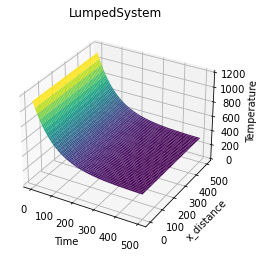

In [ ]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


n = sy.Symbol("n")
x = sy.Symbol("x")
t = sy.Symbol("t")
a = 1000
Ti = 850 + 273
T_infinite = 40 + 273
Cp = 434
h = 450
row = 7832
k = 63.9
A = 3.14 * 0.05 * 2
V = 3.14 / 4 * 0.05 ** 2 * 2
Bi = 0.089
expr = sy.exp(-h * A / (row * Cp * V) * t)*(Ti-T_infinite)+T_infinite
print(expr)
x_ = np.linspace(0, 500, 300)
time = np.linspace(0, 500, 300)

x_, time = np.meshgrid(x_, time)

xx = x_.flatten()
tt = time.flatten()

# Numpy 배열로 변환
# result_func = sy.lambdify((x, t), new_result, modules=['numpy'])
# result_arr = result_func(xx, tt)
result_func = sy.lambdify((x, t), expr, modules=['numpy'])
result_arr = np.vectorize(result_func)(xx, tt)
real_mat = np.real(result_arr).reshape(x_.shape)
imag_mat = np.imag(result_arr).reshape(x_.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 1200)
ax.set_ylabel('x_distance')  # x 축 이름 설정
ax.set_xlabel('Time')  # y 축 이름 설정
ax.set_zlabel('Temperature')  # z 축 이름 설정
ax.set_title('LumpedSystem')
surf = ax.plot_surface( time,x_, real_mat, cmap='viridis')
plt.savefig("집중계.jpg")
plt.show()

## 집중계 가능범위

In [ ]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = sy.Symbol("n")
x = sy.Symbol("x")
t = sy.Symbol("t")
for i,nth in enumerate(range(50)):
    print("%s 번쨰 실행중"%i)
    a = nth*20 + 10
    Ti = 30
    Ts = 50

    integrate_expr = sy.integrate(sy.exp(-(n**2)))
    result = integrate_expr.subs(n, n) - integrate_expr.subs(n, 0)
    new_result = result.subs(n, x / (2 * (a * t)**(sy.Rational(1, 2))))
    new_result = (Ti - Ts) * (2 / (3.14)**sy.Rational(1, 2)) * new_result + Ts

    x_ = np.linspace(0, 500, 3000)
    time = np.linspace(0, 500, 300)

    x_, time = np.meshgrid(x_, time)

    xx = x_.flatten()
    tt = time.flatten()

    # Numpy 배열로 변환
    # result_func = sy.lambdify((x, t), new_result, modules=['numpy'])
    # result_arr = result_func(xx, tt)
    result_func = sy.lambdify((x, t), new_result, modules=['numpy'])
    result_arr = np.vectorize(result_func)(xx, tt)
    real_mat = np.real(result_arr).reshape(x_.shape)
    imag_mat = np.imag(result_arr).reshape(x_.shape)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x_distance')  # x 축 이름 설정
    ax.set_ylabel('Time')  # y 축 이름 설정
    ax.set_zlabel('Temperature')  # z 축 이름 설정
    ax.set_title('thermal Diffusity %s'%(nth*20 + 10))
    surf = ax.plot_surface(x_, time, real_mat, cmap='viridis')
    plt.savefig("시각화표현자료/thermal_diffusity변화/a_%s.jpg"%(nth*20 + 10))
    plt.show()


### 영상으로 변환

In [ ]:
import imageio
import os

# 이미지 파일들이 저장된 디렉토리 경로
image_dir = './시각화표현자료/thermal_diffusity변화'

# 이미지 파일들의 리스트를 가져옴
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
image_files = sorted(image_files, key = lambda x:int(x[2:x.rfind('.')]))
# 영상으로 만들기 위한 이미지 파일들의 경로 리스트
image_paths = [os.path.join(image_dir, f) for f in image_files]

# 영상의 FPS(Frames Per Second) 설정
fps = 15

# 영상 파일 경로
output_file = 'output.mp4'

# 이미지 파일들을 읽어와서 영상으로 변환
with imageio.get_writer(output_file, format='mp4', mode='I', fps=fps) as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)

print(f"영상 생성 완료: {output_file}")